In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from yellowbrick.regressor import residuals_plot

df = pd.read_csv("Car_Purchasing_Data.csv",encoding='ISO-8859-1')
#To make it easier to access the columns
df.columns = df.columns.str.lower().str.replace(" ","_")
df.head(20)

/Users/MH/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


,customer_name,customer_e-mail,country,gender,age,annual_salary,credit_card_debt,net_worth,car_purchase_amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
5,Carla Hester,mi@Aliquamerat.edu,Liberia,1,56.824893,68499.85162,14179.472440,428485.3604,56611.99784
6,Griffin Rivera,vehicula@at.co.uk,Syria,1,46.607315,39814.52200,5958.460188,326373.1812,28925.70549
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,1,50.193016,51752.23445,10985.696560,629312.4041,47434.98265
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,0,46.584745,58139.25910,3440.823799,630059.0274,48013.61410
9,Rhonda Chavez,nec@nuncest.com,Somalia,1,43.323782,53457.10132,12884.078680,476643.3544,38189.50601


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_name        500 non-null    object 
 1   customer_e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual_salary        500 non-null    float64
 6   credit_card_debt     500 non-null    float64
 7   net_worth            500 non-null    float64
 8   car_purchase_amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,500.0,0.506000,0.500465,0.0,0.000000,1.000000,1.000000,1.0
age,500.0,46.241674,7.978862,20.0,40.949969,46.049901,51.612263,70.0
annual_salary,500.0,62127.239608,11703.378228,20000.0,54391.977195,62915.497035,70117.862005,100000.0
credit_card_debt,500.0,9607.645049,3489.187973,100.0,7397.515792,9655.035568,11798.867487,20000.0
net_worth,500.0,431475.713625,173536.756340,20000.0,299824.195900,426750.120650,557324.478725,1000000.0
car_purchase_amount,500.0,44209.799218,10773.178744,9000.0,37629.896040,43997.783390,51254.709517,80000.0


In [4]:
df.isnull().sum()

customer_name          0
customer_e-mail        0
country                0
gender                 0
age                    0
annual_salary          0
credit_card_debt       0
net_worth              0
car_purchase_amount    0
dtype: int64

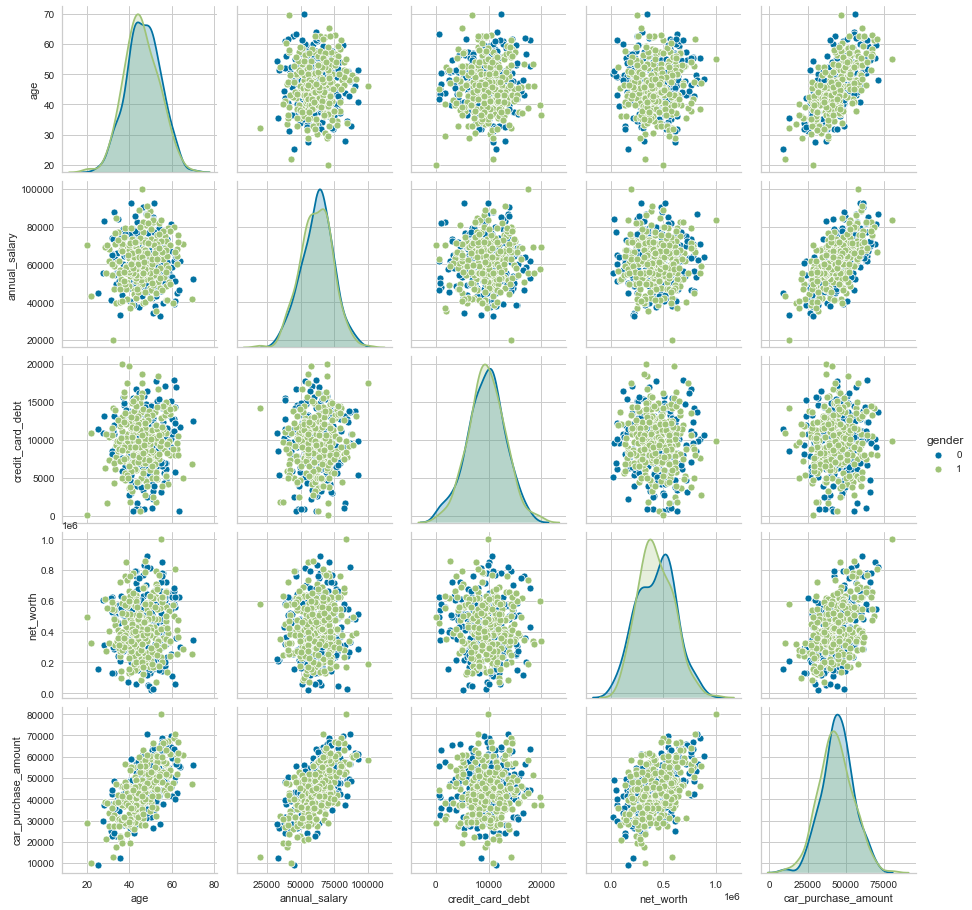

In [5]:
sns.pairplot(df, hue='gender')

In [2]:
df.columns
x = df.drop(["car_purchase_amount","customer_e-mail","country","customer_name"],axis=1)
y = df.car_purchase_amount.values.reshape(-1,1)

X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

x_train = X_scaler.fit_transform(x_train)
y_train = y_scaler.fit_transform(y_train)

In [7]:
x.columns

Index(['gender', 'age', 'annual_salary', 'credit_card_debt', 'net_worth'], dtype='object')

In [8]:
x_train.view()

array([[1.        , 0.32940985, 0.59061324, 0.64816444, 0.38448314],
       [0.        , 0.54584012, 0.52888896, 0.48904811, 0.82696976],
       [0.        , 0.54291441, 0.45865976, 0.39429326, 0.67912413],
       ...,
       [0.        , 0.45602459, 0.39273771, 0.44854581, 0.34955546],
       [1.        , 0.46461979, 0.39274385, 0.56438213, 0.62898685],
       [0.        , 0.57683319, 0.54648602, 0.59110876, 0.28461225]])

In [9]:
model = Sequential()
model.add(Dense(25,input_dim = 5, activation='relu'))
model.add(Dense(25,input_dim = 5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')
epochs_hist = model.fit(x_train, y_train, epochs=40, batch_size=25,  verbose=1, validation_split=0.2)

Train on 320 samples, validate on 80 samples
Epoch 1/40
320/320 [==============================] - 2s 7ms/sample - loss: 0.2485 - val_loss: 0.1295
Epoch 2/40
320/320 [==============================] - 0s 449us/sample - loss: 0.1006 - val_loss: 0.0394
Epoch 3/40
320/320 [==============================] - 0s 457us/sample - loss: 0.0299 - val_loss: 0.0097
Epoch 4/40
320/320 [==============================] - 0s 493us/sample - loss: 0.0110 - val_loss: 0.0092
Epoch 5/40
320/320 [==============================] - 0s 504us/sample - loss: 0.0105 - val_loss: 0.0092
Epoch 6/40
320/320 [==============================] - 0s 449us/sample - loss: 0.0091 - val_loss: 0.0066
Epoch 7/40
320/320 [==============================] - 0s 609us/sample - loss: 0.0080 - val_loss: 0.0057
Epoch 8/40
320/320 [==============================] - 0s 458us/sample - loss: 0.0073 - val_loss: 0.0054
Epoch 9/40
320/320 [==============================] - 0s 446us/sample - loss: 0.0066 - val_loss: 0.0054
Epoch 10/40
320/320 [

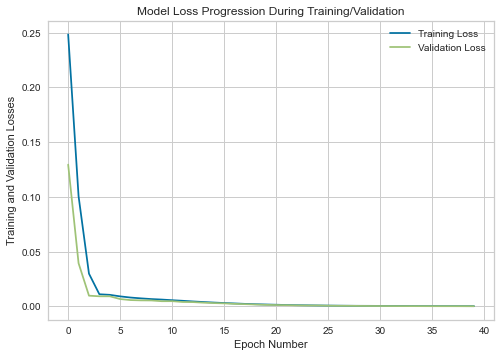

In [11]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

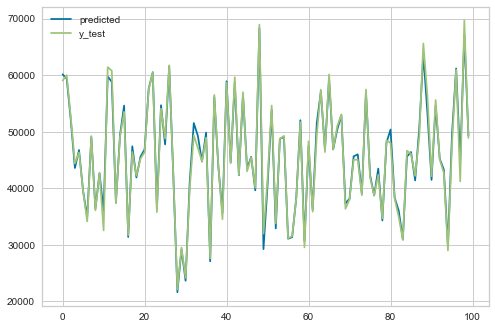

In [12]:
predicted = model.predict(X_scaler.transform(x_test))
predicted = y_scaler.inverse_transform(predicted)
results = pd.DataFrame({"predicted":list(predicted.reshape(-1)),"y_test":list(y_test.reshape(-1))})
results.plot()

In [9]:
results = results.sort_values("y_test", ascending=False)

In [10]:
results["error"] = results["predicted"] - results["y_test"]

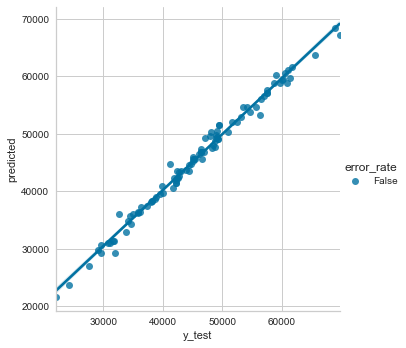

In [15]:
q75, q25 = np.quantile(results.error, [0.75,0.25])
IQR = q75-q25
high_skew = q75 * (IQR * 1.5)
low_skew = q25 * (IQR * 1.5)
results["error_rate"] = results.error.apply(lambda x: True if x > high_skew or x < low_skew else False)
sns.lmplot(x="y_test", y = "predicted", data=results, hue="error_rate")

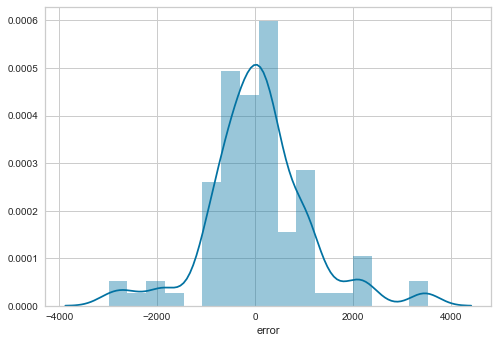

In [16]:
sns.distplot(results.error)

### Hyperparameter tuning and grid search

In [3]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

def create_model():
    model = Sequential()
    model.add(Dense(25,input_dim = 5, activation='relu'))
    model.add(Dense(25,input_dim = 5, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = KerasRegressor(build_fn=create_model, verbose =1)
batch_size = [15,20,25,30,40,50]
epochs = [20,30,40,50,60]
param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=1)
grid_result = grid.fit(x_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


Using TensorFlow backend.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  3.2min finished


Train on 400 samples
Epoch 1/60
400/400 [==============================] - 2s 4ms/sample - loss: 0.1508
Epoch 2/60
400/400 [==============================] - 0s 256us/sample - loss: 0.0357
Epoch 3/60
400/400 [==============================] - 0s 222us/sample - loss: 0.0118
Epoch 4/60
400/400 [==============================] - 0s 251us/sample - loss: 0.0085
Epoch 5/60
400/400 [==============================] - 0s 240us/sample - loss: 0.0065
Epoch 6/60
400/400 [==============================] - 0s 289us/sample - loss: 0.0047
Epoch 7/60
400/400 [==============================] - 0s 311us/sample - loss: 0.0034
Epoch 8/60
400/400 [==============================] - 0s 222us/sample - loss: 0.0027
Epoch 9/60
400/400 [==============================] - 0s 255us/sample - loss: 0.0023
Epoch 10/60
400/400 [==============================] - 0s 423us/sample - loss: 0.0020
Epoch 11/60
400/400 [==============================] - 0s 308us/sample - loss: 0.0017
Epoch 12/60
400/400 [=======================

In [4]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000138 using {'batch_size': 15, 'epochs': 60}
-0.002253 (0.002612) with: {'batch_size': 15, 'epochs': 20}
-0.000367 (0.000258) with: {'batch_size': 15, 'epochs': 30}
-0.000255 (0.000099) with: {'batch_size': 15, 'epochs': 40}
-0.000147 (0.000084) with: {'batch_size': 15, 'epochs': 50}
-0.000138 (0.000045) with: {'batch_size': 15, 'epochs': 60}
-0.001536 (0.001066) with: {'batch_size': 20, 'epochs': 20}
-0.001186 (0.000832) with: {'batch_size': 20, 'epochs': 30}
-0.000245 (0.000166) with: {'batch_size': 20, 'epochs': 40}
-0.000170 (0.000062) with: {'batch_size': 20, 'epochs': 50}
-0.000264 (0.000057) with: {'batch_size': 20, 'epochs': 60}
-0.007911 (0.002670) with: {'batch_size': 25, 'epochs': 20}
-0.001072 (0.000232) with: {'batch_size': 25, 'epochs': 30}
-0.000378 (0.000014) with: {'batch_size': 25, 'epochs': 40}
-0.000475 (0.000413) with: {'batch_size': 25, 'epochs': 50}
-0.000259 (0.000124) with: {'batch_size': 25, 'epochs': 60}
-0.001253 (0.000597) with: {'batch_size': 30,

## Best: -0.000138 using {'batch_size': 15, 'epochs': 60}

Train on 320 samples, validate on 80 samples
Epoch 1/60
320/320 [==============================] - 1s 4ms/sample - loss: 0.0144 - val_loss: 0.0061
Epoch 2/60
320/320 [==============================] - 0s 496us/sample - loss: 0.0060 - val_loss: 0.0046
Epoch 3/60
320/320 [==============================] - 0s 473us/sample - loss: 0.0043 - val_loss: 0.0038
Epoch 4/60
320/320 [==============================] - 0s 512us/sample - loss: 0.0033 - val_loss: 0.0030
Epoch 5/60
320/320 [==============================] - 0s 515us/sample - loss: 0.0025 - val_loss: 0.0021
Epoch 6/60
320/320 [==============================] - 0s 482us/sample - loss: 0.0018 - val_loss: 0.0017
Epoch 7/60
320/320 [==============================] - 0s 605us/sample - loss: 0.0013 - val_loss: 0.0011
Epoch 8/60
320/320 [==============================] - 0s 494us/sample - loss: 9.2861e-04 - val_loss: 7.9023e-04
Epoch 9/60
320/320 [==============================] - 0s 484us/sample - loss: 6.4890e-04 - val_loss: 6.3256e-04
Epoch

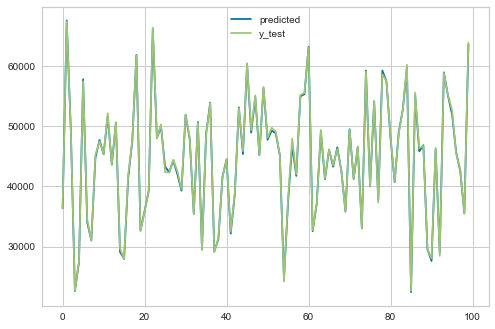

In [7]:
model = create_model()
model.fit(x_train, y_train, epochs=60, batch_size=15,  verbose=1, validation_split=0.2)
predicted = model.predict(X_scaler.transform(x_test))
predicted = y_scaler.inverse_transform(predicted)
results = pd.DataFrame({"predicted":list(predicted.reshape(-1)),"y_test":list(y_test.reshape(-1))})
results.plot()

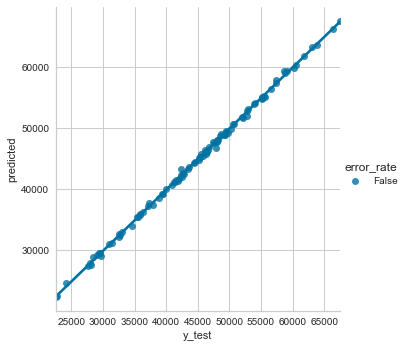

In [11]:
q75, q25 = np.quantile(results.error, [0.75,0.25])
IQR = q75-q25
high_skew = q75 * (IQR * 1.5)
low_skew = q25 * (IQR * 1.5)
results["error_rate"] = results.error.apply(lambda x: True if x > high_skew or x < low_skew else False)
sns.lmplot(x="y_test", y = "predicted", data=results, hue="error_rate")